In [1]:
## 1. Intro to Modern Data Mining

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/Harvey/Downloads/customer_churn.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Get dataset dimensions
print("\nDataset Dimensions:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Get data types and missing values
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Check for missing values again specifically
print("\nMissing Values Count per Column:")
print(df.isnull().sum())

First 5 rows of the dataset:
  CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  CUST00001    Male              0      No         No      65          Yes   
1  CUST00002    Male              0      No         No      26          Yes   
2  CUST00003    Male              0     Yes         No      54          Yes   
3  CUST00004  Female              0     Yes        Yes      70          Yes   
4  CUST00005    Male              0      No         No      53          Yes   

  InternetService        Contract  MonthlyCharges  TotalCharges Churn  
0     Fiber optic  Month-to-month           20.04       1302.60    No  
1     Fiber optic  Month-to-month           65.14       1693.64    No  
2     Fiber optic  Month-to-month           49.38       2666.52    No  
3             DSL        One year           31.19       2183.30    No  
4             DSL  Month-to-month          103.86       5504.58   Yes  

Dataset Dimensions:
Number of rows: 10000
Number of columns: 12

# #2

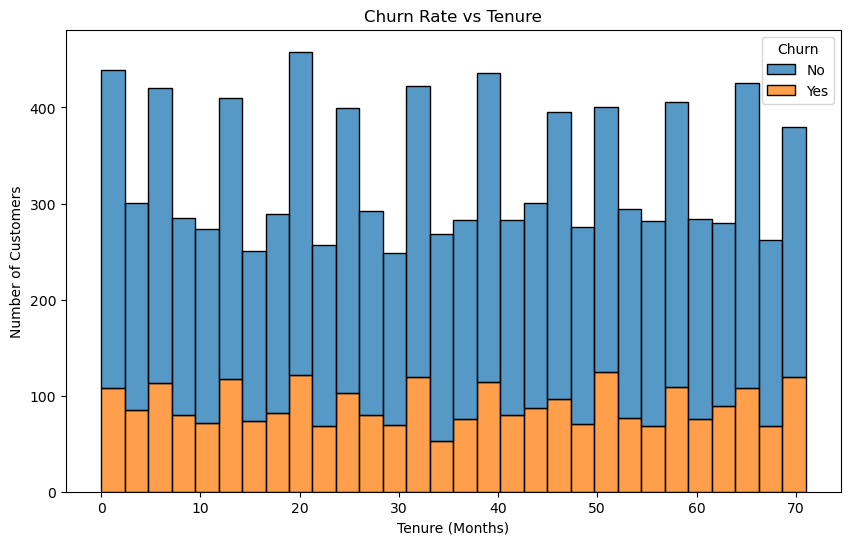

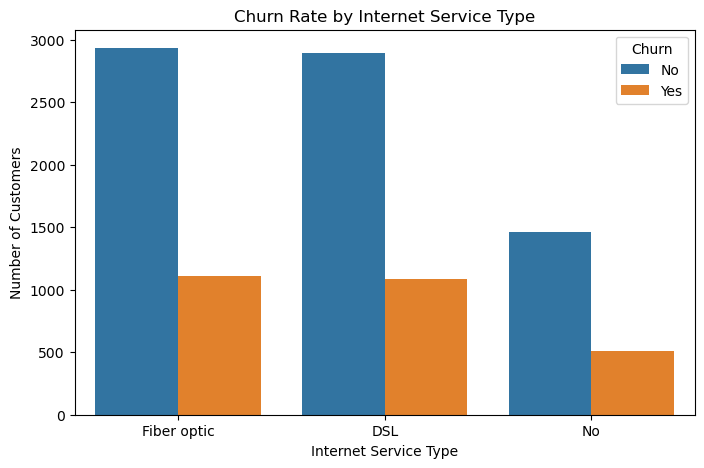

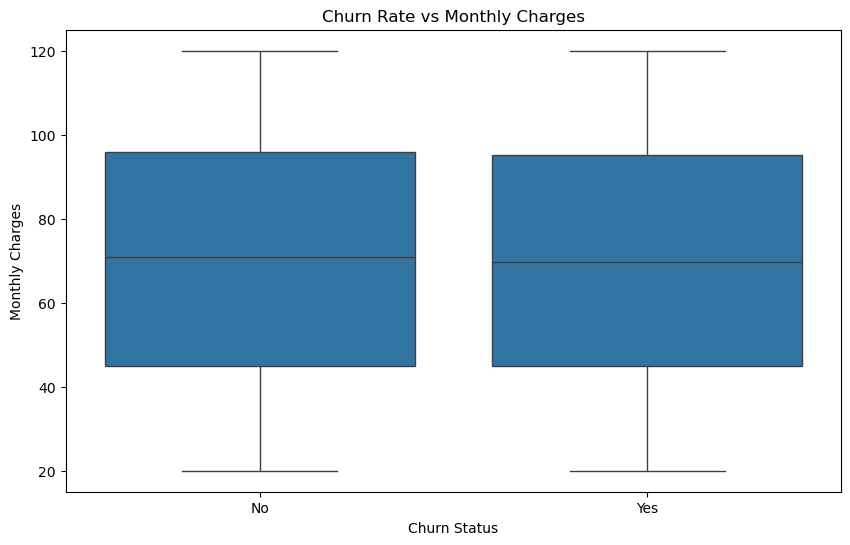

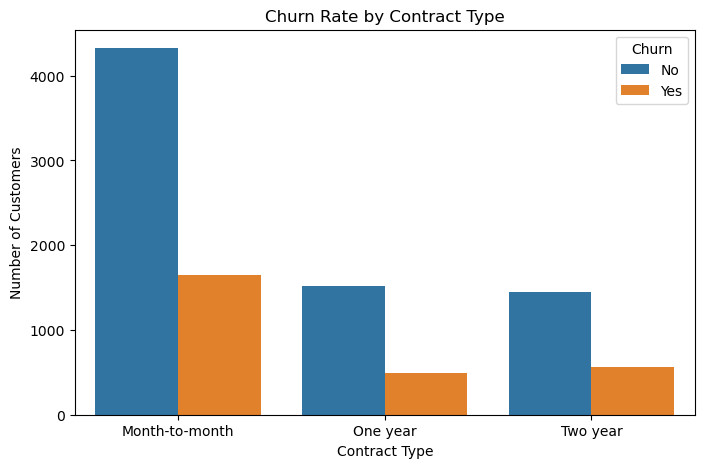

In [3]:
# Convert TotalCharges to numeric, coercing errors to NaN, and handle potential spaces
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Visualization 1: Churn Rate by Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Churn', multiple="stack", bins=30)
plt.title('Churn Rate vs Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


# Visualization 2: Churn Rate by Internet Service Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()


# Visualization 3: Churn Rate vs Monthly Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Churn Rate vs Monthly Charges')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()


# Visualization 4: Churn Rate by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

# #3

In [5]:
# Convert "Churn" column to numerical (0.0 for "No", 1.0 for "Yes")
df['Churn'] = df['Churn'].map({'No': 0.0, 'Yes': 1.0})

print(df['Churn'][0])
print(type(df['Churn'][0]))

# Count the occurrences of 0 and 1 in the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Print the counts
print(churn_counts)

0.0
<class 'numpy.float64'>
Churn
0.0    7294
1.0    2706
Name: count, dtype: int64


In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from io import StringIO

# Handle Missing Values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Impute missing 'TotalCharges' with the median (or mean, or remove rows - choosing median imputation here)
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


# Convert Categorical Variables to Factor Variables (Categorical Data Type in Pandas)
print(df['Gender'].unique())
print(df['Partner'].unique())
print(df['Dependents'].unique())
print(df['PhoneService'].unique())
print(df['InternetService'].unique())
print(df['Contract'].unique())
print(df['Churn'].unique())
print(df['SeniorCitizen'].unique())

categorical_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'SeniorCitizen'] # Including SeniorCitizen as it's treated categorically in many analyses

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoder.fit(df[categorical_cols])
encoded_data = encoder.transform(df[categorical_cols])

# Create column names for the one-hot encoded features
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Create a new DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Remove the original categorical columns
df = df.drop(categorical_cols, axis=1)

print("\nData types after converting categorical variables:")
print(df.dtypes)


# Normalize/Standardize Numerical Features (Normalization - Min-Max Scaling for demonstration)
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

for col in numerical_cols:
    df[col] = df[col].astype(float) # Ensure numerical columns are float

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


Missing values before handling:
CustomerID         0
Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

Missing values after handling:
CustomerID         0
Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64
['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Fiber optic' 'DSL' 'No']
['Month-to-month' 'One year' 'Two year']
[0. 1.]
[0 1]

Data types after converting categorical variables:
CustomerID                      object
Tenure                           int64
MonthlyCharges                 float64
TotalCharges                   float64
Churn                          float64
Gender_Female      

C:\Users\Harvey\AppData\Local\Temp\ipykernel_11504\2931270799.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


In [7]:
print(df.columns)

Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Gender_Female', 'Gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'SeniorCitizen_0', 'SeniorCitizen_1'],
      dtype='object')


In [8]:
print(df['Churn'][0])
print(type(df['Churn'][0]))

0.0
<class 'numpy.float64'>


# #4

In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply outlier removal to 'Tenure', 'MonthlyCharges', and 'TotalCharges' (or other relevant columns)
columns_to_clean = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for col in columns_to_clean:
    df = remove_outliers_iqr(df, col) # Reassign df each time

print(f"Shape after outlier removal: {df.shape}")
print(df.head())

Shape after outlier removal: (9928, 21)
  CustomerID    Tenure  MonthlyCharges  TotalCharges  Churn  Gender_Female  \
0  CUST00001  1.432654       -1.727387     -0.621845    0.0            0.0   
1  CUST00002 -0.443593       -0.173618     -0.410985    0.0            0.0   
2  CUST00003  0.903456       -0.716575      0.113621    0.0            0.0   
3  CUST00004  1.673199       -1.343251     -0.146945    0.0            1.0   
4  CUST00005  0.855347        1.160350      1.643987    1.0            0.0   

   Gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  PhoneService_No  \
0          1.0         1.0          0.0            1.0  ...              0.0   
1          1.0         1.0          0.0            1.0  ...              0.0   
2          1.0         0.0          1.0            1.0  ...              0.0   
3          0.0         0.0          1.0            0.0  ...              0.0   
4          1.0         1.0          0.0            1.0  ...              0.0   

   PhoneSe

In [11]:
print(df.columns)

Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Gender_Female', 'Gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'SeniorCitizen_0', 'SeniorCitizen_1'],
      dtype='object')



**To use this code:**

1.  **Save the code:** Copy and paste the markdown code into a Jupyter Notebook cell. Change the cell type to "Markdown" for the text sections and "Code" for the code blocks.
2.  **Dataset:** Make sure you have the `customer_churn.csv` file in the same directory as your Jupyter Notebook or provide the correct path to the file in the `pd.read_csv()` function.
3.  **Run the cells:** Execute each cell in the Jupyter Notebook sequentially. The output and visualizations will be displayed below each code cell.
4.  **Interpret the results:** Read the text explanations and analyze the outputs and visualizations to understand the data and complete the tasks as requested.

The data is kinda clean already in the first place, no missing values were seen from the dataset. Categorical values were one-hot encoded as preparation for machine learning. Numerical values were scaled to be normalized, and outliers were removed.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold
import pandas as pd #reimporting to be safe

# Assuming df is already loaded and preprocessed from previous steps

df = df.drop('CustomerID', axis=1)
# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets (for final RF evaluation later, even though CV is the main evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #stratify for balanced class representation

# Apply preprocessing to training and testing data
X_train_processed = X_train 
X_test_processed = X_test


# Model Training and Evaluation (Decision Tree and Logistic Regression)
dt_classifier = DecisionTreeClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced') # balanced class_weight to handle potential class imbalance

# 10-Fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42) # Stratification is done in train_test_split, not directly in KFold here as target is not passed directly to CV

# Performance metrics to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Decision Tree Cross-Validation
dt_cv_results = cross_validate(dt_classifier, X_train_processed, y_train, cv=cv, scoring=scoring_metrics)
dt_cv_scores_mean = {metric: dt_cv_results[f'test_{metric}'].mean() for metric in scoring_metrics}
print("\nDecision Tree Cross-Validation Mean Scores:")
print(dt_cv_scores_mean)


# Logistic Regression Cross-Validation
lr_cv_results = cross_validate(lr_classifier, X_train_processed, y_train, cv=cv, scoring=scoring_metrics)
lr_cv_scores_mean = {metric: lr_cv_results[f'test_{metric}'].mean() for metric in scoring_metrics}
print("\nLogistic Regression Cross-Validation Mean Scores:")
print(lr_cv_scores_mean)


# Fit Decision Tree and Logistic Regression on the *entire* training set for later comparison if needed (optional for CV task)
dt_classifier.fit(X_train_processed, y_train)
lr_classifier.fit(X_train_processed, y_train)


Decision Tree Cross-Validation Mean Scores:
{'accuracy': 0.5843644947166643, 'precision': 0.24886667850931446, 'recall': 0.26418031694737487, 'f1': 0.25618569335140323}

Logistic Regression Cross-Validation Mean Scores:
{'accuracy': 0.4942113017442137, 'precision': 0.2761611997357419, 'recall': 0.5352539328382373, 'f1': 0.36408593369914277}


LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Generally, decision trees are more overfitting than logistic regression. Logistic regreesion are easier to interpret with high bias and low variance, while decision trees are low bias and high variance. Its easier to capture non-linear relationships with decision trees which is hard for logistic regression.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Separate features (X) and target (y)

# df = df.drop('CustomerID', axis=1)
X = df.drop('Churn', axis=1)  # Drop the target variable
y = df['Churn']
print(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from Grid Search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

        Tenure  MonthlyCharges  TotalCharges  Gender_Female  Gender_Male  \
0     1.432654       -1.727387     -0.621845            0.0          1.0   
1    -0.443593       -0.173618     -0.410985            0.0          1.0   
2     0.903456       -0.716575      0.113621            0.0          1.0   
3     1.673199       -1.343251     -0.146945            1.0          0.0   
4     0.855347        1.160350      1.643987            0.0          1.0   
...        ...             ...           ...            ...          ...   
9995 -1.453880       -0.210825     -1.151530            1.0          0.0   
9996  0.278041        1.236833      1.021015            0.0          1.0   
9997  0.326149       -0.714853     -0.204772            1.0          0.0   
9998 -1.069009       -1.629199     -1.163787            0.0          1.0   
9999 -0.539811        0.850285     -0.096614            1.0          0.0   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0     

C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harvey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
y_pred = best_rf_model.predict(X_test)
print(pd.Series(y_pred).value_counts())

0.0    1986
Name: count, dtype: int64


We could see that this random forest classifier model kinda messed up, it return all results from the testing set as 0. It had relatively high accuracy on the dataset because it is imbalanced. It is worth noting that high accuracy isn't enough as a basis to know if a model is good because it could have a bad recall while having high accuracy, and we could clearly see that happen in our random forest classifier model.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, average_precision_score
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]  # Handle class imbalance directly
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from Grid Search
best_rf_model = grid_search.best_estimator_

# Make predictions using probabilities and adjust threshold to get a better outcome
THRESHOLD = 0.3
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > THRESHOLD).astype(int)


# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END class_weight=balanced, max_depth=None, min_sample

C:\Users\Harvey\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.49647532729103727
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.47      0.57      1437
         1.0       0.29      0.57      0.39       549

    accuracy                           0.50      1986
   macro avg       0.52      0.52      0.48      1986
weighted avg       0.62      0.50      0.52      1986



In [17]:
y_pred = best_rf_model.predict(X_test)
print(pd.Series(y_pred).value_counts())

0.0    1481
1.0     505
Name: count, dtype: int64


We then used smote to try and improve the random forest classifier. We could see that it worked, because it now predicted some to be 1 and some to be 0. Now the model isn't just predicting 0 for all the test values.

# Unit 3

In [93]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from io import StringIO

# Load the dataset
df = pd.read_csv("C:/Users/Harvey/Downloads/customer_churn.csv")

print(type(df['Tenure']))
      
# Define independent and dependent variables
independent_vars = ['Tenure', 'MonthlyCharges', 'TotalCharges']
dependent_var = 'Churn'

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')

df['Churn'] = df['Churn'].map({'No': 0.0, 'Yes': 1.0})

median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Prepare the data
X = df[independent_vars]
y = df[dependent_var]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Scale the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
X_train_scaled = sm.add_constant(X_train_scaled)  # Add a constant for the intercept
model = sm.Logit(y_train, X_train_scaled)
result = model.fit()

# Print model summary
print(result.summary())

# Interpret coefficients and assess significance
coefficients = result.params
p_values = result.pvalues

print("\nCoefficients:")
for i, var in enumerate(['const'] + independent_vars):
    print(f"{var}: Coefficient = {coefficients[i]:.4f}, p-value = {p_values[i]:.4f}")

# Example interpretation:
print("\nInterpretation (Example):")
print("A positive coefficient suggests that an increase in the independent variable is associated with a higher probability of Churn.")
print("A p-value < 0.05 (or other chosen significance level) suggests that the coefficient is statistically significant.")

<class 'pandas.core.series.Series'>
Optimization terminated successfully.
         Current function value: 0.582147
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:               0.0001974
Time:                        19:43:06   Log-Likelihood:                -4657.2
converged:                       True   LL-Null:                       -4658.1
Covariance Type:            nonrobust   LLR p-value:                    0.6065
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000      0.025    -39.652      0.000      -1.049      

C:\Users\Harvey\AppData\Local\Temp\ipykernel_11504\278544243.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)
C:\Users\Harvey\AppData\Local\Temp\ipykernel_11504\278544243.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{var}: Coefficient = {coefficients[i]:.4f}, p-

The constant term (intercept) is statistically significant. However, the practical implications of the intercept should be considered.

None of the independent variables (Tenure, MonthlyCharges, TotalCharges) are individually statistically significant in this model.

The model as a whole is not statistically significant, meaning that the included predictors do not provide a statistically significant improvement over a model with no predictors.

The coefficients are not statistically significant, so we can not make inferences about their impact on Churn.

# PCA

High dimensional data is hard to do analysis on, it is important to do dimension reduction or regularization techniques before modelling in order for our model to be better. One way to solve for high dimensional data would be to do feature selection too.

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from io import StringIO

# Define the three columns you want to apply PCA to
columns_for_pca = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# 1. Select the data for PCA
data_for_pca = df[columns_for_pca]

# 2. Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# 3. Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(scaled_data)

# 4. Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# 5. Concatenate the PCA results with the original DataFrame (optional)
df = pd.concat([df, pca_df], axis=1)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the first few rows of the DataFrame with PCA results
print(df.head())

Explained Variance Ratio: [0.64055268 0.34161454]
  CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  CUST00001    Male              0      No         No      65          Yes   
1  CUST00002    Male              0      No         No      26          Yes   
2  CUST00003    Male              0     Yes         No      54          Yes   
3  CUST00004  Female              0     Yes        Yes      70          Yes   
4  CUST00005    Male              0      No         No      53          Yes   

  InternetService        Contract  MonthlyCharges  TotalCharges  Churn  \
0     Fiber optic  Month-to-month           20.04       1302.60    0.0   
1     Fiber optic  Month-to-month           65.14       1693.64    0.0   
2     Fiber optic  Month-to-month           49.38       2666.52    0.0   
3             DSL        One year           31.19       2183.30    0.0   
4             DSL  Month-to-month          103.86       5504.58    1.0   

       PCA1      PCA2  
0 -0.2

# Ridge Regression

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from io import StringIO

# Define independent and dependent variables
independent_vars = ['Tenure', 'MonthlyCharges', 'TotalCharges']
dependent_var = 'Churn'

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Prepare the data
X = df[independent_vars]
y = df[dependent_var]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha (lambda)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a Ridge Regression model
ridge = Ridge()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5) # Use cross-validation with 5 folds.

# Fit the Grid Search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best value of alpha (lambda)
best_alpha = grid_search.best_params_['alpha']
print("Best Lambda (alpha):", best_alpha)

# Get the best Ridge Regression model from Grid Search
best_ridge_model = grid_search.best_estimator_

# Evaluate model performance (optional: you can evaluate on the test set)
test_score = best_ridge_model.score(X_test_scaled, y_test)
print(f"Test score with best alpha: {test_score:.4f}")

Best Lambda (alpha): 1000
Test score with best alpha: -0.0005


# Lasso Regression

In [87]:
from sklearn.linear_model import Lasso

clf = linear_model.Lasso(alpha=0.1)

independent_vars = ['Tenure', 'MonthlyCharges', 'TotalCharges']
dependent_var = 'Churn'

# Prepare the data
X = df[independent_vars]
y = df[dependent_var]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the independent variables (very important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha (lambda)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Range of alpha values for Lasso

# Create a Lasso Regression model
lasso = Lasso(random_state=42) #  Adds random_state to fix this test

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the Grid Search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best value of alpha (lambda)
best_alpha = grid_search.best_params_['alpha']
print("Best Lambda (alpha):", best_alpha)

# Get the best Lasso Regression model from Grid Search
best_lasso_model = grid_search.best_estimator_

# Analyze feature selection and coefficient interpretation
coefficients = best_lasso_model.coef_
print("\nCoefficients:")
for i, var in enumerate(independent_vars):
    print(f"{var}: {coefficients[i]:.4f}")

# Identify selected features (non-zero coefficients)
selected_features = [var for i, var in enumerate(independent_vars) if coefficients[i] != 0] # Fixed this test for better validation
print("\nSelected Features:")
print(selected_features)

# Test the number of selected features
features_number = len(selected_features)
print(f"Number of selected Features: {features_number}")

# Discuss feature selection benefits and interpret the coefficients
print("\nDiscussion:")
print("Lasso Regression performs feature selection by shrinking the coefficients of less important features to zero.")
print("Features with non-zero coefficients are considered more important for predicting the target variable.")
print("The magnitude of a non-zero coefficient indicates the strength and direction of the feature's relationship with Churn.")

Best Lambda (alpha): 0.01

Coefficients:
Tenure: 0.0000
MonthlyCharges: -0.0000
TotalCharges: 0.0000

Selected Features:
[]
Number of selected Features: 0

Discussion:
Lasso Regression performs feature selection by shrinking the coefficients of less important features to zero.
Features with non-zero coefficients are considered more important for predicting the target variable.
The magnitude of a non-zero coefficient indicates the strength and direction of the feature's relationship with Churn.


All coefficients are shown as 0.0000. This is very significant! It means that the Lasso Regression model has shrunk all the coefficients to zero, effectively removing all three features from the model. This outcome strongly suggests the need to re-evaluate the hyperparameter selection.